In [41]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance 
import sklearn.manifold
import sklearn.datasets
import sklearn.cluster
import umap
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Voy a manejar un dataset con imagenes correspondientes a dígitos en lenguaje de señas particionado en carpetas de
#acuerdo al dígito correspondiente
files_val = glob.glob('./Dataset/*/*.JPG')
datos=len(files_val)
siz=14
Data=np.zeros((datos,siz*siz))
target=np.zeros(datos)
count=0
images=[]
#Función para calcular el brillo
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale
#Leo los datos por carpetas y asigno el target correspondiente
for i in range(10):
    files_val = glob.glob('./Dataset/'+str(i)+'/*.JPG')
    for names in files_val:
        im=Image.open(names)
        out=(im.convert('L')).resize((siz,siz))
        #Aqui voy a incluir una parte para tratar de normalizar el brillo
        enhancer = ImageEnhance.Brightness(out)
        out=enhancer.enhance(0.9/calculate_brightness(out))
        images.append(out)
        Data[count,:]=(np.array(out).reshape((-1,1)).T).astype(float)
        target[count]=i
        count=count+1

In [42]:
#Dividimos los datos y estandarizamos
x_train,x_test,y_train,y_test,i_train,i_test= train_test_split(Data,target,images,train_size=0.5)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Text(0.5, 1.0, 'Matriz de Confusion (Score=0.73)')

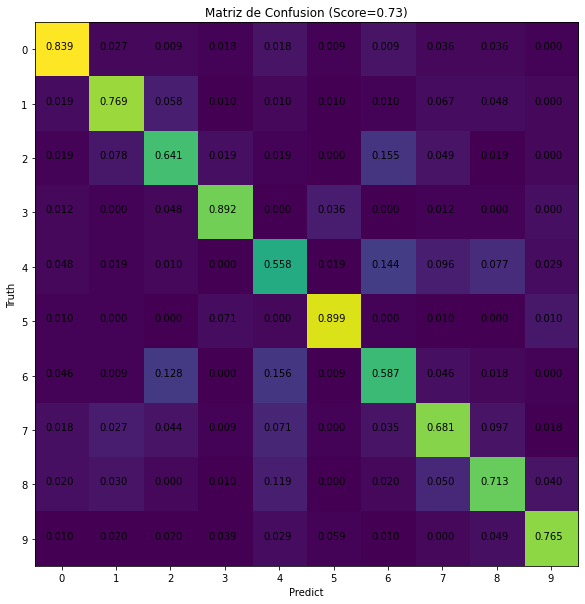

In [43]:
#Probamos la regresión logistica con los parametros del ejercicio anterior
clf = LogisticRegression( C=10, penalty='l2', solver='saga', tol=0.01)
MatConf=np.zeros((10,10))
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
scorel=clf.score(x_test, y_test)
for i in range(10):
    for i2 in range(10):
        MatConf[i,i2]=np.sum((y_test==i)*(y_pred==i2))
plt.figure(figsize=(10,10))
CNames=["0","1","2","3","4","5","6","7","8","9"]
Ejes=["Truth","Predict"]
plt.imshow(MatConf)
plt.ylabel("Truth")
plt.xlabel("Predict")
plt.xticks(np.arange(10),CNames)
plt.yticks(np.arange(10),CNames)
for i in range(10):
    for i2 in range(10):
        plt.text (i-0.3,i2,"%2.3f"%(MatConf[i,i2]/np.sum(MatConf[:,i2])))
plt.title("Matriz de Confusion (Score=%4.2f)"%scorel)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization h

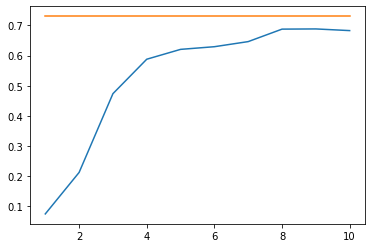

In [44]:
#Ahora probamos la red neuronal, primero probando con una capa oculta
scoreN=np.zeros(10)
for neurons in range(1,11):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                               hidden_layer_sizes=(neurons),max_iter=2000)
    mlp.fit(x_train, y_train)
    scoreN[neurons-1]=sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')
plt.plot(range(1,11),scoreN)
plt.plot(range(1,11),scorel*np.ones(10))

In [45]:
#Ahora con dos capas
scoreN2=np.zeros((5,9))
for neurons1 in range(1,6):
    for neurons2 in range(2,11):
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                               hidden_layer_sizes=(neurons),max_iter=2000)
        mlp.fit(x_train, y_train)
        scoreN2[neurons1-1,neurons2-2]=sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')

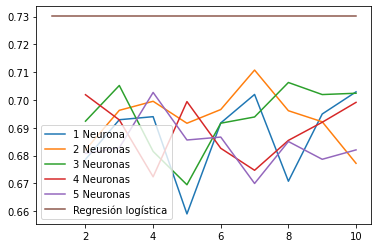

In [46]:
for i in range(1,6):
    plt.plot(range(2,11),scoreN2[i-1,:])
plt.plot(range(1,11),scorel*np.ones(10))
plt.legend(["1 Neurona","2 Neuronas","3 Neuronas","4 Neuronas","5 Neuronas","Regresión logística"])

In [48]:
#Se ve que para este caso no se encuentra mejoría usando redes neuronales